Quick Data!
---

Now, as a "fun" exercise, we're just going to go quickly through some of the stuff we covered earlier to demonstrate how Python, Pandas, NumPy and MatPlotLib can work together. I don't know how you spend your evenings, but me? I like to check out datasets on data.gov!

Standard library imports...

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here's a simple CSV file showing some power usage for zip codes over time. I've added the URL in case the file gets corrupted. Please feel free to download your own, though the column and row names (not to mention Series and DataFrame sizes may be different).

In [28]:
# http://catalog.data.gov/dataset/average-monthly-residential-energy-usage-by-zip-code-0487d
power_data = pd.read_csv(r'Average_monthly_residential_energy_usage_By_zip_code.csv',header=0)
power_data.columns.values

array(['FY 05/06', 'FY 06/07', 'FY 07/08', 'FY 08/09', 'FY 09/10',
       'FY 10/11', 'FY 11/12', 'FY 12/13', 'Location 1'], dtype=object)

In [29]:
power_data['Location 1']

0       90058\n(34.00184426500044, -118.22112680399971)
1       90065\n(34.10881395500047, -118.22766603799971)
2        91311\n(34.25282047300044, -118.5950275619997)
3      90059\n(33.927010235000466, -118.24839605799968)
4       90004\n(34.07572239300049, -118.30301712299968)
5        91405\n(34.20047184600048, -118.4486964669997)
6        90047\n(33.95687345800047, -118.3090784049997)
7       91607\n(34.16615064800044, -118.39933720499971)
8        90069\n(34.08940047000044, -118.3797890249997)
9       90048\n(34.07316318500045, -118.37406665299972)
10      90005\n(34.05907233200048, -118.30301712299968)
11       91316\n(34.16673287800046, -118.5162960619997)
12     91367\n(34.178642539000464, -118.60957898599969)
13       90292\n(33.98163129900047, -118.4511079449997)
14      90056\n(33.98651074000048, -118.36959998699967)
15       91602\n(34.15134286900047, -118.3690785869997)
16       91604\n(34.14446038000045, -118.3942796179997)
17     91504\n(34.198251548000485, -118.33049928

In [30]:
power_data['Location 1'] = power_data['Location 1'].str[:5]

In [31]:
power_data = power_data.set_index('Location 1')

In [32]:
power_data = power_data.sort_index()

In [33]:
power_data.index.name = 'Zip Code'

In [34]:
columns = pd.date_range(start='01-01-2005',end='01-01-2012',freq='AS-JAN')

In [35]:
columns

DatetimeIndex(['2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [36]:
power_data.columns = columns

In [37]:
power_data['Avg.'] = power_data.mean(axis=1)

In [38]:
power_data

,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,Avg.
Zip Code,,,,,,,,,
90001,334,343,345,336,336,330,329,341,336.750
90002,358,368,367,353,352,351,346,355,356.250
90003,316,323,328,321,316,313,312,317,318.250
90004,378,387,391,380,370,363,357,373,374.875
90005,320,328,326,315,313,310,307,309,316.000
90006,254,262,262,258,255,253,254,261,257.375
90007,298,306,313,305,294,275,276,285,294.000
90008,373,381,379,371,360,356,351,351,365.250
90009,370,444,490,537,202,328,276,258,363.125


In [39]:
power_data.ix[:,5].name

Timestamp('2010-01-01 00:00:00', offset='AS-JAN')

In [40]:
power_data.index[0:10].values

array(['90001', '90002', '90003', '90004', '90005', '90006', '90007',
       '90008', '90009', '90010'], dtype=object)

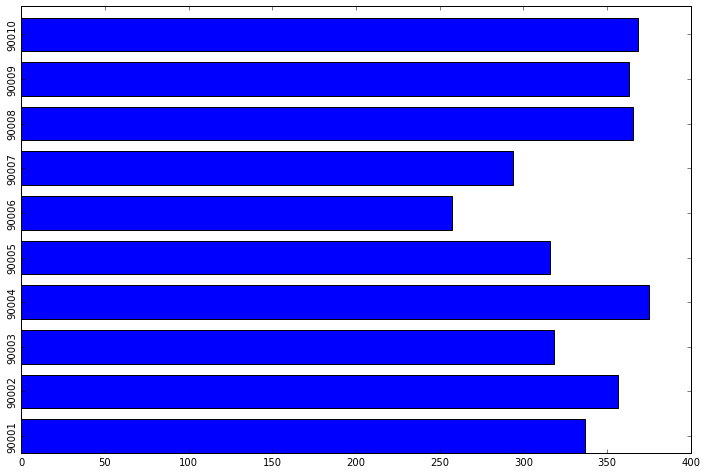

In [41]:
barWidth = .75
plt.figure(figsize=(12,8))
plt.barh(np.arange(10),power_data['Avg.'][0:10],barWidth)
# plt.margins(0.2)
# plt.subplots_adjust(bottom=0.15)
# plt.bar?
plt.yticks(np.arange(10)+ (barWidth / 2),power_data.index[0:10],rotation=90);

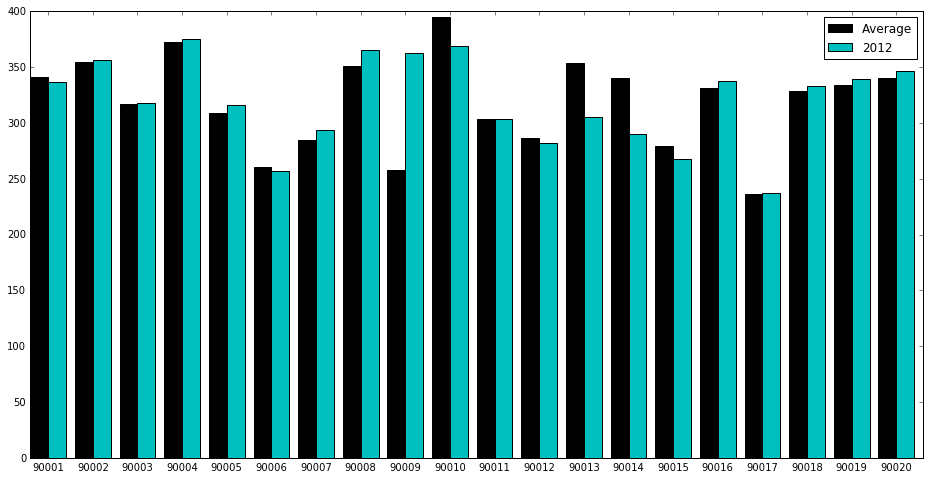

In [44]:
startZip = 0
samples = 20
endZip = startZip + samples
index = np.arange(samples)
powerZip = power_data.ix[startZip:endZip].index.values
barWidth = .4
powerAvg = power_data.ix[startZip:endZip,8:9].values
powerYear = power_data.ix[startZip:endZip,7:8].values

power_chart = plt.figure(figsize=(16,8))
power1 = plt.bar(index, powerYear, barWidth, color='k', label='Average')
power2 = plt.bar(index + barWidth, powerAvg, barWidth, color='c', label='2012')
plt.xticks(index + barWidth, powerZip )
plt.legend();